# Data analysis on Harmful Particulate in the air (Particulate Matter PM 2.5)

---

#### Name: Jon Sham
#### Admin Number: P2317342
#### Class: DAAA/FT/1B/06

---

## Links

#### https://beta.data.gov.sg/datasets/d_397fe8de643aea9927bdee32e49307ff/view

#### https://beta.data.gov.sg/collections/505/view

#### https://github.com/AndreaPi/Open-industrial-datasets

#### https://zenodo.org/records/3754964

#### https://www.bts.gov/topics/national-transportation-statistics

---

## Background:

#### Mr Tan, an environmental service agent under the Ministry Of Sustainability and the Environment Agency, wants to find out if the amount of Particulate Matter specifically Particular Matter PM 2.5 in the air is posing as a safety hazard to the public. After finding out if it is a safety hazard, he wants to find the main causes of the discharge of this particulate matter. By doing so, he hopes to establish more measures to be put in place to reduce the production of this harmful particulate matter.

---

# Part 1

#### finding out if there is a correlation between amount of particular matter pm 2.5 in the air and medical records of patients with chronic obstructive lung disease

---

## Importing Required Libraries and Files 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data Files/AirPollutantParticulateMatterPM2.5.csv') 
df2 = pd.read_csv('Data Files/Top10ConditionsofHospitalisation.csv')



## Data Wrangling 

#### Standaising year range for df

In [8]:
df = df[(df['year']<2012) & (df['year']>2000)]
df.head(35)

,year,pm2.5_mean
0,2002,23
1,2003,19
2,2004,21
3,2005,21
4,2006,23
5,2007,19
6,2008,16
7,2009,19
8,2010,17
9,2011,17


#### Standaising year range for df2

In [9]:
df2 = df2[(df2['year']<2022) & (df2['year']>2000)]
df2.head(35)

,year,rank,icd,classification,disease_condition,percentage_discharges
110,2001,1,ICD9,800-999,"Accidents, poisoning & violence",8.5
111,2001,2,ICD9,140-208,Cancer,5.1
112,2001,3,ICD9,410-414,Ischaemic heart diseases,3.9
113,2001,4,ICD9,480-486,Pneumonia,2.9
114,2001,5,ICD9,430-438,Cerebrovascular disease (including Stroke),2.8
115,2001,6,ICD9,640-648,Complications related to pregnancy,2.8
116,2001,7,ICD9,490-493 & 496,Chronic obstructive lung disease,2.6
117,2001,8,ICD9,"393-398, 402, 415- 429",Other heart diseases,2.4
118,2001,9,ICD9,680-686,Infections of skin & subcutaneous tissue,1.9
119,2001,10,ICD9,001-009,Intestinal infectious diseases,1.8


#### Selecting only Chronic obstructive lung disease from df2

In [10]:
Specific = df2.dropna().disease_condition.str.contains('^Chronic obstructive lung disease',regex=True)    
df2 = df2.dropna()[Specific]  

df2

,year,rank,icd,classification,disease_condition,percentage_discharges
116,2001,7,ICD9,490-493 & 496,Chronic obstructive lung disease,2.6
127,2002,8,ICD9,490-493 & 496,Chronic obstructive lung disease,2.2
137,2003,8,ICD9,490-493 & 496,Chronic obstructive lung disease,2.1
146,2004,7,ICD9,490-493 & 496,Chronic obstructive lung disease,2.1
156,2005,7,ICD9,490-493 & 496,Chronic obstructive lung disease,2.3
166,2006,7,ICD9,490-493 & 496,Chronic obstructive lung disease,2.3
175,2007,6,ICD9,490-493 & 496,Chronic obstructive lung disease,2.4
186,2008,7,ICD9,490-493 & 496,Chronic obstructive lung disease,2.3
198,2009,9,ICD9,490-493 & 496,Chronic obstructive lung disease,2.0
206,2010,7,ICD9,490-493 & 496,Chronic obstructive lung disease,2.2


## Exploratory Data Analysis

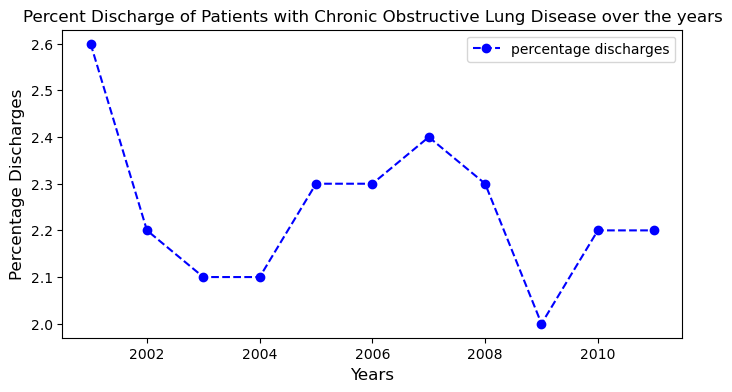

In [11]:
years = [i for i in range(2001,2012)] 

plt.figure(figsize=(8, 4))
plt.plot(years,df2['percentage_discharges'] ,'b--',marker='o',label='percentage discharges') 


plt.title('Percent Discharge of Patients with Chronic Obstructive Lung Disease over the years')
plt.xlabel('Years',fontsize=12)
plt.ylabel('Percentage Discharges',fontsize=12)
plt.legend(loc='best')

plt.show()

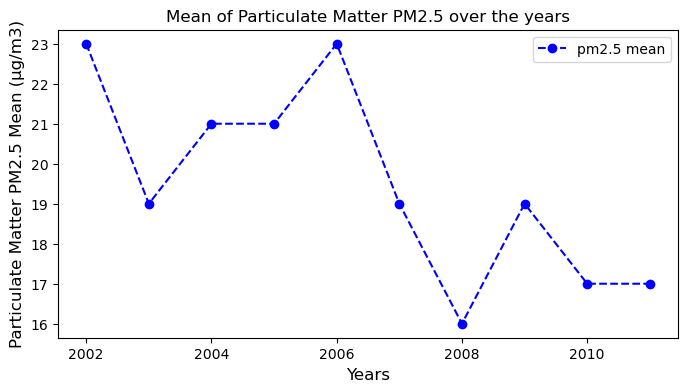

In [12]:
years = [i for i in range(2002,2012)]

plt.figure(figsize=(8, 4))
plt.plot(years,df['pm2.5_mean'] ,'b--',marker='o',label='pm2.5 mean')
 
plt.title('Mean of Particulate Matter PM2.5 over the years')
plt.xlabel('Years',fontsize=12)
plt.ylabel('Particulate Matter PM2.5 Mean (µg/m3)',fontsize=12)
plt.legend(loc='best')

plt.show()

## Conclusion

#### Based on the eda, Mr Tan confirms a correlation between the amount of particular matter pm 2.5 in the air and medical records of patients with chronic obstructive lung disease. This can be seen as, the first graph shows from 2001 to 2003, there was a decrease in patient discharges and graph 2 from 2001 to 2003, there was a decrease in mean of particular matter pm 2.5, 2004 to 2006, in graph 1 there was an increase in patient discharges and graph 2 from 2001 to 2006, there was an increase in mean of particular matter pm 2.5. Lastly from 2007 to 2008 there was a decrease in patient discharges and graph 2 from 2007 to 2008, there was a decrease in mean of particular matter pm 2.5. Another thing noted is this was for patients discharged not patients admitted hence explains why there was a slight delay in change for about half to a year in both graphs trends.

---

# Part 2

#### Now that Mr Tan has confirmed a clear correlation, he wants to move on to his next action, to discover to main produces of this harmful particulate matter. He does extensive research and finds out that liquid fuel and natural gas combustion releases pm 2.5 when incompletly combusted. He narrows his research to sectors that use most liquid fuel and natural gas combustion.

---

## Importing Required Files 

In [13]:
df3 = pd.read_csv('Data Files/CEDS_GBD-MAPS_NMVOC_global_emissions_by_country_sector_fuel_2020_v1.csv')

df3.head(35)

,Country_iso,Sector,Fuel,Unit,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,abw,AGR,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,abw,AGR,PROCESS,kt C/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,abw,AGR,SOLID_BIOFUEL,kt C/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,abw,AGR,TOTAL_COAL,kt C/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,abw,ENE,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.010412,0.010758,0.010054,0.010463,0.007668,0.007177,...,0.000534,0.000548,0.000761,0.000437,0.000433,0.000271,0.000263,0.000277,0.000284,0.000182
5,abw,ENE,PROCESS,kt C/year,0.010819,0.010888,0.010465,0.009109,0.009133,0.020319,...,0.302640,0.425431,0.207576,0.258100,0.246419,0.246804,0.247198,0.247562,0.247903,0.248220
6,abw,ENE,SOLID_BIOFUEL,kt C/year,0.000008,0.000006,0.000006,0.000005,0.000005,0.000020,...,0.000010,0.000010,0.000012,0.000009,0.000012,0.000013,0.000018,0.000025,0.000023,0.000020
7,abw,ENE,TOTAL_COAL,kt C/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,abw,IND,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.098967,0.017894,0.022865,0.020745,0.017536,0.015816,...,0.022467,0.022704,0.015812,0.012748,0.016255,0.011452,0.010682,0.010405,0.010030,0.009936
9,abw,IND,PROCESS,kt C/year,0.000808,0.000813,0.000818,0.000824,0.000827,0.000829,...,0.001383,0.001384,0.001387,0.001391,0.001397,0.001406,0.001414,0.001422,0.001429,0.001436


#### lets focus on the liquid fuel and natural gas combustion

In [14]:
Specific = df3.dropna().Fuel.str.contains('^LIQUID_FUEL_PLUS_NATURAL_GAS',regex=True)    
df3 = df3.dropna()[Specific]  

df3

,Country_iso,Sector,Fuel,Unit,1970,1971,1972,1973,1974,1975,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,abw,AGR,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,abw,ENE,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.010412,0.010758,0.010054,0.010463,0.007668,0.007177,...,0.000534,0.000548,0.000761,0.000437,0.000433,0.000271,0.000263,0.000277,0.000284,0.000182
8,abw,IND,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.098967,0.017894,0.022865,0.020745,0.017536,0.015816,...,0.022467,0.022704,0.015812,0.012748,0.016255,0.011452,0.010682,0.010405,0.010030,0.009936
12,abw,NRTR,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.011358,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004576,0.004409,0.005388,0.002895,0.001778,0.001106,0.001485,0.001314,0.001485,0.001483
16,abw,RCOC,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001081,0.001075,0.017131,0.099449,0.118449,0.132262,0.085416,0.062324,0.056443,0.056021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9748,zwe,RCOR,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.002514,0.002773,0.003081,0.003183,0.003081,0.003491,...,0.002239,0.002171,0.002198,0.002484,0.002989,0.003840,0.004751,0.005905,0.007145,0.008093
9752,zwe,ROAD,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,16.788628,17.461221,20.606318,22.173948,18.083567,22.866965,...,14.840314,16.419489,18.765190,21.663880,23.547508,26.093369,23.266558,25.132085,21.424738,20.131176
9756,zwe,SHP,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9760,zwe,SLV,LIQUID_FUEL_PLUS_NATURAL_GAS,kt C/year,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### set sector as index 

In [15]:
group_by_frame = df3.groupby('Sector')

In [16]:
df3 = group_by_frame.mean(numeric_only=True)

df3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Sector,,,,,,,,,,,,,,,,,,,,,
AGR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENE,0.316732,0.347712,0.390992,0.435359,0.436281,0.435614,0.469533,0.479253,0.507538,0.524760,...,0.990671,1.013342,1.109943,1.181253,1.203747,1.185764,1.188387,1.233201,1.191762,1.137189
IND,1.836883,1.965981,2.089326,2.280293,2.272920,2.289181,2.449761,2.595658,3.241783,3.302255,...,3.470909,3.241799,3.140025,3.333898,3.624713,3.620672,3.656694,3.722353,3.769572,4.056210
NRTR,4.368188,4.152889,4.741427,5.246826,5.518856,5.288132,5.722125,5.901983,6.138971,6.469322,...,6.454430,6.045785,5.465853,5.635826,5.372555,5.142378,4.965031,5.438600,5.273238,5.336505
RCOC,1.782354,1.869155,1.989445,1.819547,1.718256,1.591438,1.714221,1.701228,1.717816,1.646340,...,0.807151,0.803978,0.824646,0.801079,0.779848,0.772668,0.724705,0.748317,0.732280,0.731608
RCOO,5.838514,6.141810,6.341429,8.176196,8.113530,8.367579,8.690489,8.832817,9.662684,10.426719,...,8.461185,8.090206,7.380071,6.357084,6.406416,6.186514,5.875965,5.608408,5.338893,5.348592
RCOR,0.191826,0.207670,0.216817,0.213969,0.202161,0.213441,0.227584,0.231120,0.242365,0.245065,...,0.687134,0.790851,0.734148,0.718389,0.735794,0.710494,0.713934,0.726971,0.739174,0.749140
ROAD,129.101823,134.232824,140.013376,144.929951,141.562773,143.304293,148.541759,152.926438,159.483171,159.057497,...,150.897726,143.029220,141.592851,143.713412,149.294556,148.684257,143.489917,142.199931,138.377094,135.530171
SHP,1.727938,1.764469,1.847941,1.942089,1.803887,1.648827,1.697312,1.688289,1.695572,1.746359,...,4.433066,3.727106,3.434717,3.857025,3.450957,3.437221,3.530939,3.633618,3.715674,3.799112


#### for loop to make col into intergers and drop years less than 2001 and more than 2011 to standardise year range

In [17]:
columns_to_drop = [col for col in df3.columns if int(col) < 2001 or int(col) > 2011]

In [18]:
df3 = df3.drop(columns=columns_to_drop)

df3

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Sector,,,,,,,,,,,
AGR,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENE,0.691243,0.740171,0.781733,0.818905,0.873709,0.904703,0.950616,0.990671,1.013342,1.109943,1.181253
IND,3.221681,3.694660,3.635322,3.488066,3.267548,3.541185,3.465872,3.470909,3.241799,3.140025,3.333898
NRTR,6.764032,8.031213,7.739072,7.484906,7.434327,7.397809,7.172228,6.454430,6.045785,5.465853,5.635826
RCOC,1.108507,1.173887,1.108802,1.024884,0.898504,0.864554,0.854084,0.807151,0.803978,0.824646,0.801079
RCOO,10.051313,9.716085,9.734686,10.206943,9.683468,8.916673,8.399593,8.461185,8.090206,7.380071,6.357084
RCOR,0.604652,0.669793,0.659611,0.669193,0.678447,0.723267,0.690628,0.687134,0.790851,0.734148,0.718389
ROAD,147.237079,142.596967,141.961877,144.220606,143.138690,146.286290,146.793565,150.897726,143.029220,141.592851,143.713412
SHP,2.891305,2.941367,3.124401,3.387000,3.595756,3.922027,4.213594,4.433066,3.727106,3.434717,3.857025


#### What do the sectors short form mean:
#### AGR - Agriculture, ENE - Energy, IND - Industry, NRTR - Natural Resources and Mining, RCOC - Real Estate and Construction, RCOO - Commerce and Services, RCOR - Communication, ROAD - Road Transport, SHP - Shipping, SLV - Silver , WST - Waste Management


#### lets rename the rows

In [19]:
df3.index = df3.index.str.replace('AGR', 'Agriculture')
df3.index = df3.index.str.replace('ENE', 'Energy')
df3.index = df3.index.str.replace('IND', 'Industry')
df3.index = df3.index.str.replace('NRTR', 'Natural Resources and Mining')
df3.index = df3.index.str.replace('RCOC', 'Real Estate and Construction')
df3.index = df3.index.str.replace('RCOO', 'Commerce and Services')
df3.index = df3.index.str.replace('RCOR', 'Communication')
df3.index = df3.index.str.replace('ROAD', 'Road Transport')
df3.index = df3.index.str.replace('SHP', 'Shipping')
df3.index = df3.index.str.replace('SLV', 'Silver')
df3.index = df3.index.str.replace('WST', 'Waste Management')

df3

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Sector,,,,,,,,,,,
Agriculture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Energy,0.691243,0.740171,0.781733,0.818905,0.873709,0.904703,0.950616,0.990671,1.013342,1.109943,1.181253
Industry,3.221681,3.694660,3.635322,3.488066,3.267548,3.541185,3.465872,3.470909,3.241799,3.140025,3.333898
Natural Resources and Mining,6.764032,8.031213,7.739072,7.484906,7.434327,7.397809,7.172228,6.454430,6.045785,5.465853,5.635826
Real Estate and Construction,1.108507,1.173887,1.108802,1.024884,0.898504,0.864554,0.854084,0.807151,0.803978,0.824646,0.801079
Commerce and Services,10.051313,9.716085,9.734686,10.206943,9.683468,8.916673,8.399593,8.461185,8.090206,7.380071,6.357084
Communication,0.604652,0.669793,0.659611,0.669193,0.678447,0.723267,0.690628,0.687134,0.790851,0.734148,0.718389
Road Transport,147.237079,142.596967,141.961877,144.220606,143.138690,146.286290,146.793565,150.897726,143.029220,141.592851,143.713412
Shipping,2.891305,2.941367,3.124401,3.387000,3.595756,3.922027,4.213594,4.433066,3.727106,3.434717,3.857025


#### realised that setting the years as index would be more apropriate 

In [20]:
# reset index
df3.reset_index(inplace=True)

df3

,Sector,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Agriculture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Energy,0.691243,0.740171,0.781733,0.818905,0.873709,0.904703,0.950616,0.990671,1.013342,1.109943,1.181253
2,Industry,3.221681,3.694660,3.635322,3.488066,3.267548,3.541185,3.465872,3.470909,3.241799,3.140025,3.333898
3,Natural Resources and Mining,6.764032,8.031213,7.739072,7.484906,7.434327,7.397809,7.172228,6.454430,6.045785,5.465853,5.635826
4,Real Estate and Construction,1.108507,1.173887,1.108802,1.024884,0.898504,0.864554,0.854084,0.807151,0.803978,0.824646,0.801079
5,Commerce and Services,10.051313,9.716085,9.734686,10.206943,9.683468,8.916673,8.399593,8.461185,8.090206,7.380071,6.357084
6,Communication,0.604652,0.669793,0.659611,0.669193,0.678447,0.723267,0.690628,0.687134,0.790851,0.734148,0.718389
7,Road Transport,147.237079,142.596967,141.961877,144.220606,143.138690,146.286290,146.793565,150.897726,143.029220,141.592851,143.713412
8,Shipping,2.891305,2.941367,3.124401,3.387000,3.595756,3.922027,4.213594,4.433066,3.727106,3.434717,3.857025
9,Silver,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### loop to calculate average of all the years for each sector

In [21]:
Agri_mean, Ene_mean, Ind_mean, Nrm_mean, Rec_mean, Cs_mean, C_mean, Rt_mean, S_mean, Si_mean, Wm_mean = 0,0,0,0,0,0,0,0,0,0,0 
for i in range(0,11):
 mean = ((df3['2001'][i])+(df3['2002'][i])+(df3['2003'][i])+(df3['2004'][i])+(df3['2005'][i])+(df3['2006'][i])+(df3['2007'][i])+(df3['2008'][i])+(df3['2009'][i])+(df3['2010'][i])+(df3['2011'][i]))/11
 if i == 0:
    Agri_mean += mean
 elif i == 1:
    Ene_mean += mean
 elif i == 2:
    Ind_mean += mean
 elif i == 3:
    Nrm_mean += mean
 elif i == 4:
    Rec_mean += mean
 elif i == 5:
    Cs_mean += mean
 elif i == 6:
    C_mean += mean
 elif i == 7:
    Rt_mean += mean
 elif i == 8:
    S_mean += mean
 elif i == 9:
    Si_mean += mean
 elif i == 10:
    Wm_mean += mean


#### add a column call average of all years

In [22]:
df3['Average of All Years'] = 0

df3['Average of All Years'][0] += Agri_mean
df3['Average of All Years'][1] += Ene_mean
df3['Average of All Years'][2] += Ind_mean
df3['Average of All Years'][3] += Nrm_mean
df3['Average of All Years'][4] += Rec_mean
df3['Average of All Years'][5] += Cs_mean
df3['Average of All Years'][6] += C_mean
df3['Average of All Years'][7] += Rt_mean
df3['Average of All Years'][8] += S_mean
df3['Average of All Years'][9] += Si_mean
df3['Average of All Years'][10] += Wm_mean

df3

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26128\2888779581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Average of All Years'][0] += Agri_mean
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26128\2888779581.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Average of All Years'][1] += Ene_mean
C:\Users\ASUS\AppData\Local\Temp\ipykernel_26128\2888779581.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.9142079410483211' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3['Average of All Ye

,Sector,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,Average of All Years
0,Agriculture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Energy,0.691243,0.740171,0.781733,0.818905,0.873709,0.904703,0.950616,0.990671,1.013342,1.109943,1.181253,0.914208
2,Industry,3.221681,3.694660,3.635322,3.488066,3.267548,3.541185,3.465872,3.470909,3.241799,3.140025,3.333898,3.409179
3,Natural Resources and Mining,6.764032,8.031213,7.739072,7.484906,7.434327,7.397809,7.172228,6.454430,6.045785,5.465853,5.635826,6.875044
4,Real Estate and Construction,1.108507,1.173887,1.108802,1.024884,0.898504,0.864554,0.854084,0.807151,0.803978,0.824646,0.801079,0.933643
5,Commerce and Services,10.051313,9.716085,9.734686,10.206943,9.683468,8.916673,8.399593,8.461185,8.090206,7.380071,6.357084,8.817937
6,Communication,0.604652,0.669793,0.659611,0.669193,0.678447,0.723267,0.690628,0.687134,0.790851,0.734148,0.718389,0.693283
7,Road Transport,147.237079,142.596967,141.961877,144.220606,143.138690,146.286290,146.793565,150.897726,143.029220,141.592851,143.713412,144.678935
8,Shipping,2.891305,2.941367,3.124401,3.387000,3.595756,3.922027,4.213594,4.433066,3.727106,3.434717,3.857025,3.593397
9,Silver,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### we can use multi indexing to put sector and avg as index 

In [23]:
imp_df3 = df3.set_index(['Sector', 'Average of All Years'])

imp_df3

,,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
Sector,Average of All Years,,,,,,,,,,,
Agriculture,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Energy,0.914208,0.691243,0.740171,0.781733,0.818905,0.873709,0.904703,0.950616,0.990671,1.013342,1.109943,1.181253
Industry,3.409179,3.221681,3.694660,3.635322,3.488066,3.267548,3.541185,3.465872,3.470909,3.241799,3.140025,3.333898
Natural Resources and Mining,6.875044,6.764032,8.031213,7.739072,7.484906,7.434327,7.397809,7.172228,6.454430,6.045785,5.465853,5.635826
Real Estate and Construction,0.933643,1.108507,1.173887,1.108802,1.024884,0.898504,0.864554,0.854084,0.807151,0.803978,0.824646,0.801079
Commerce and Services,8.817937,10.051313,9.716085,9.734686,10.206943,9.683468,8.916673,8.399593,8.461185,8.090206,7.380071,6.357084
Communication,0.693283,0.604652,0.669793,0.659611,0.669193,0.678447,0.723267,0.690628,0.687134,0.790851,0.734148,0.718389
Road Transport,144.678935,147.237079,142.596967,141.961877,144.220606,143.138690,146.286290,146.793565,150.897726,143.029220,141.592851,143.713412
Shipping,3.593397,2.891305,2.941367,3.124401,3.387000,3.595756,3.922027,4.213594,4.433066,3.727106,3.434717,3.857025


## Exploratary Data Analysis

#### lets plot a bar chart showing the Average of All Years to see which sector used the most liquid fuel and natural gas in kilotons

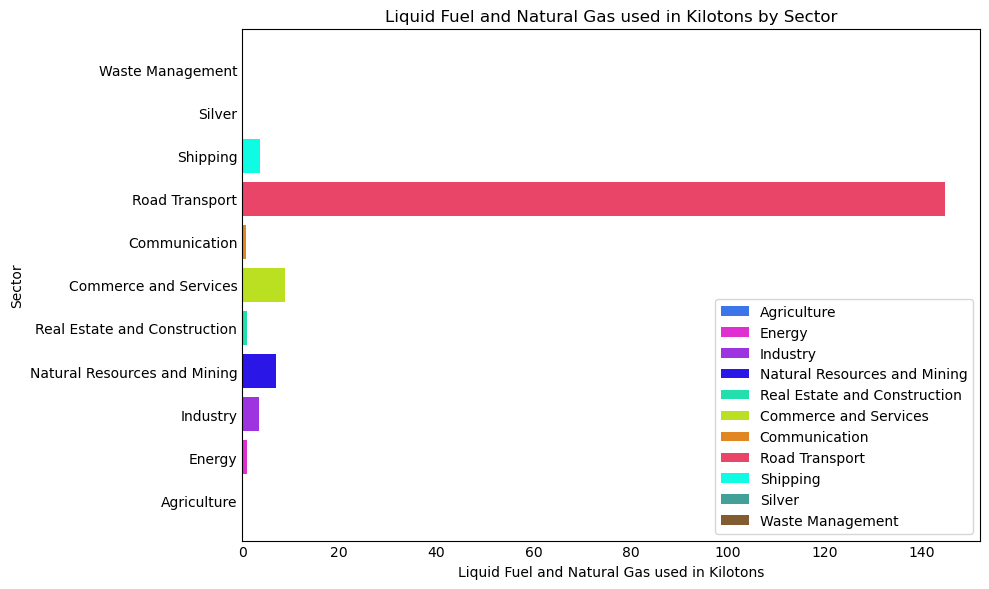

In [24]:
plt.style.use("_mpl-gallery-nogrid")
plt.figure(figsize=(10, 6))

X = df3['Sector']

Y = df3['Average of All Years']

colors = ['#3C74EA', '#DF2FD1', '#9D34E0', '#2A16E7', '#21E0AE', '#BBE021', '#E08721', '#E94568', '#0EFBE4', '#41A097', '#835B30']

label = ['Agriculture', 'Energy', 'Industry', 'Natural Resources and Mining', 'Real Estate and Construction', 'Commerce and Services', 'Communication', 'Road Transport', 'Shipping', 'Silver', 'Waste Management']

plt.barh(X, Y, label=label, color=colors)

plt.legend()

plt.title("Liquid Fuel and Natural Gas used in Kilotons by Sector")
plt.xlabel("Liquid Fuel and Natural Gas used in Kilotons")
plt.ylabel("Sector")

plt.tight_layout()

plt.show()

## Conclusion

#### After the eda, Mr Tan is able to determine the highest producer of pm 2.5 while using a horizontal bar chart to compare the usage of Liquid Fuel and Natural Gas used in Kilotons by Sector. The highest producer was the Road Transport Sector.

---

# Part 3

#### Mr Tan realised that the road transport sector is a vast sector consisting of many modes of transport. He wanted to go a step furthur to figure out which mode of transport was using the most liquid fuel. That way it would be more efficient to take establish measures.

---

## Importing Required Files 

In [25]:
df4 = pd.read_csv('Data Files/IndustrialVehiclesFuelUsagekt.csv')

df4.head(35)

,Year,Truck,Delivery Van,Bus,Cargo Truck,Flatbed Truck
0,1990,302.3,51.1,47.5,180.6,22.3
1,1991,310.8,53.4,49.8,187.2,24.1
2,1992,318.4,55.9,52.2,193.7,25.9
3,1993,324.9,58.2,54.5,200.3,27.6
4,1994,332.2,60.4,56.9,206.8,29.4
5,1995,340.7,62.6,59.2,213.4,31.2
6,1996,347.1,64.8,61.6,219.9,33.0
7,1997,356.5,67.3,63.9,226.5,34.8
8,1998,364.2,69.7,66.3,233.0,36.6
9,1999,372.9,72.0,68.6,239.6,38.3


#### one main concern about this dataset i took for github is that i noticed some major outliers which may cause the dataset to be not be very relaible but i can plot a box plot to visualise the outliers

## Data Wrangling

#### as metioned earlier i found some outliers that could affect the integrity of the dataset hence i feel there are more first i will use a boxplot to visualise the outliers

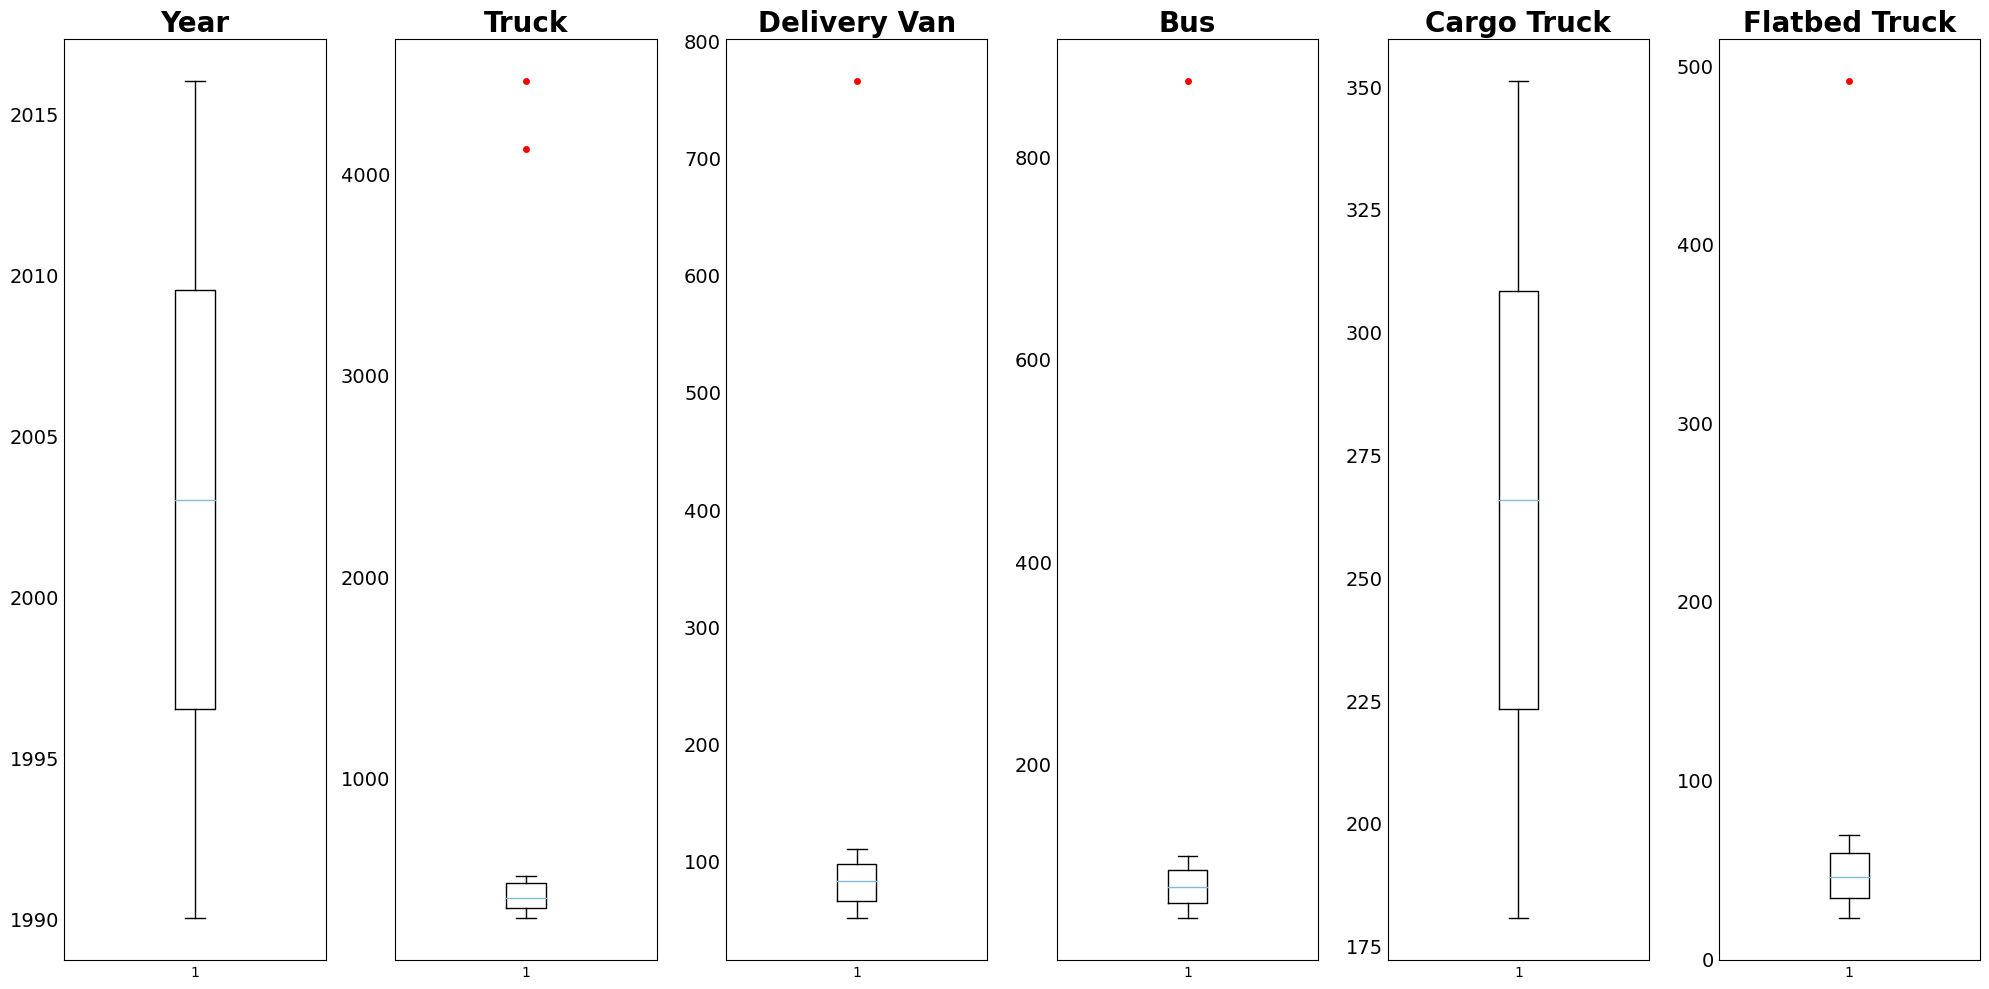

In [26]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df4.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df4.iloc[:,i], flierprops=red_circle)
    ax.set_title(df4.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### as we can see indicated by the red dots are out outliers for truck we have 2 distinct outliers above 4000, for delivery van, we have 1 distinct outlier near 800, for bus we have one distinct outlier above 800, cargo truck we have no outliers and finally flatbed truck we have one distinct outlier near 500

#### now i am going to use z-score to deal with the outliers for truck

In [27]:
Truck_upper_limit = df4['Truck'].mean() + 3*df4['Truck'].std()
Truck_lower_limit = df4['Truck'].mean() - 3*df4['Truck'].std()
print(f'Upper Limit of Truck is: {Truck_upper_limit}\nLower Limit of Truck is: {Truck_lower_limit}')

# find the outliers
df4['Truck'].loc[(df4['Truck']>Truck_upper_limit) | (df4['Truck'] < Truck_lower_limit)]

# now we change the outlier values to the mean
df4.loc[df4['Truck']>Truck_upper_limit, 'Truck'] = df4['Truck'].mean()



Upper Limit of Truck is: 3810.5247824125313
Lower Limit of Truck is: -2427.1914490791983


#### now i do the same for delivery van, bus and flatbed truck

In [28]:
# Delivery Van
Delivery_upper_limit = df4['Delivery Van'].mean() + 3*df4['Delivery Van'].std()
Delivery_lower_limit = df4['Delivery Van'].mean() - 3*df4['Delivery Van'].std()
print(f'Upper Limit of Delivery Van is: {Delivery_upper_limit}\nLower Limit of Delivery Van is: {Delivery_lower_limit}')

# find the outliers
df4['Delivery Van'].loc[(df4['Delivery Van']>Delivery_upper_limit) | (df4['Delivery Van'] < Delivery_lower_limit)]

# change to mean
df4.loc[df4['Delivery Van']>Delivery_upper_limit, 'Delivery Van'] = df4['Delivery Van'].mean()

# Bus
Bus_upper_limit = df4['Bus'].mean() + 3*df4['Bus'].std()
Bus_lower_limit = df4['Bus'].mean() - 3*df4['Bus'].std()
print(f'Upper Limit of Bus is: {Bus_upper_limit}\nLower Limit of Bus is: {Bus_lower_limit}')

# find the outliers
df4['Bus'].loc[(df4['Bus']>Bus_upper_limit) | (df4['Bus'] < Bus_lower_limit)]

# change to mean
df4.loc[df4['Bus']>Bus_upper_limit, 'Bus'] = df4['Bus'].mean()

# Flatbed Truck
Flatbed_upper_limit = df4['Flatbed Truck'].mean() + 3*df4['Flatbed Truck'].std()
Flatbed_lower_limit = df4['Flatbed Truck'].mean() - 3*df4['Flatbed Truck'].std()
print(f'Upper Limit of Flatbed Truck is: {Flatbed_upper_limit}\nLower Limit of Flatbed Truck is: {Flatbed_lower_limit}')

# find the outliers
df4['Flatbed Truck'].loc[(df4['Flatbed Truck']>Flatbed_upper_limit) | (df4['Flatbed Truck'] < Flatbed_lower_limit)]

# change to mean
df4.loc[df4['Flatbed Truck']>Flatbed_upper_limit, 'Flatbed Truck'] = df4['Flatbed Truck'].mean()



Upper Limit of Delivery Van is: 504.90803591301983
Lower Limit of Delivery Van is: -292.28581369079757
Upper Limit of Bus is: 570.2819380831597
Lower Limit of Bus is: -355.9634195646412
Upper Limit of Flatbed Truck is: 322.6308072786133
Lower Limit of Flatbed Truck is: -198.91228876009478


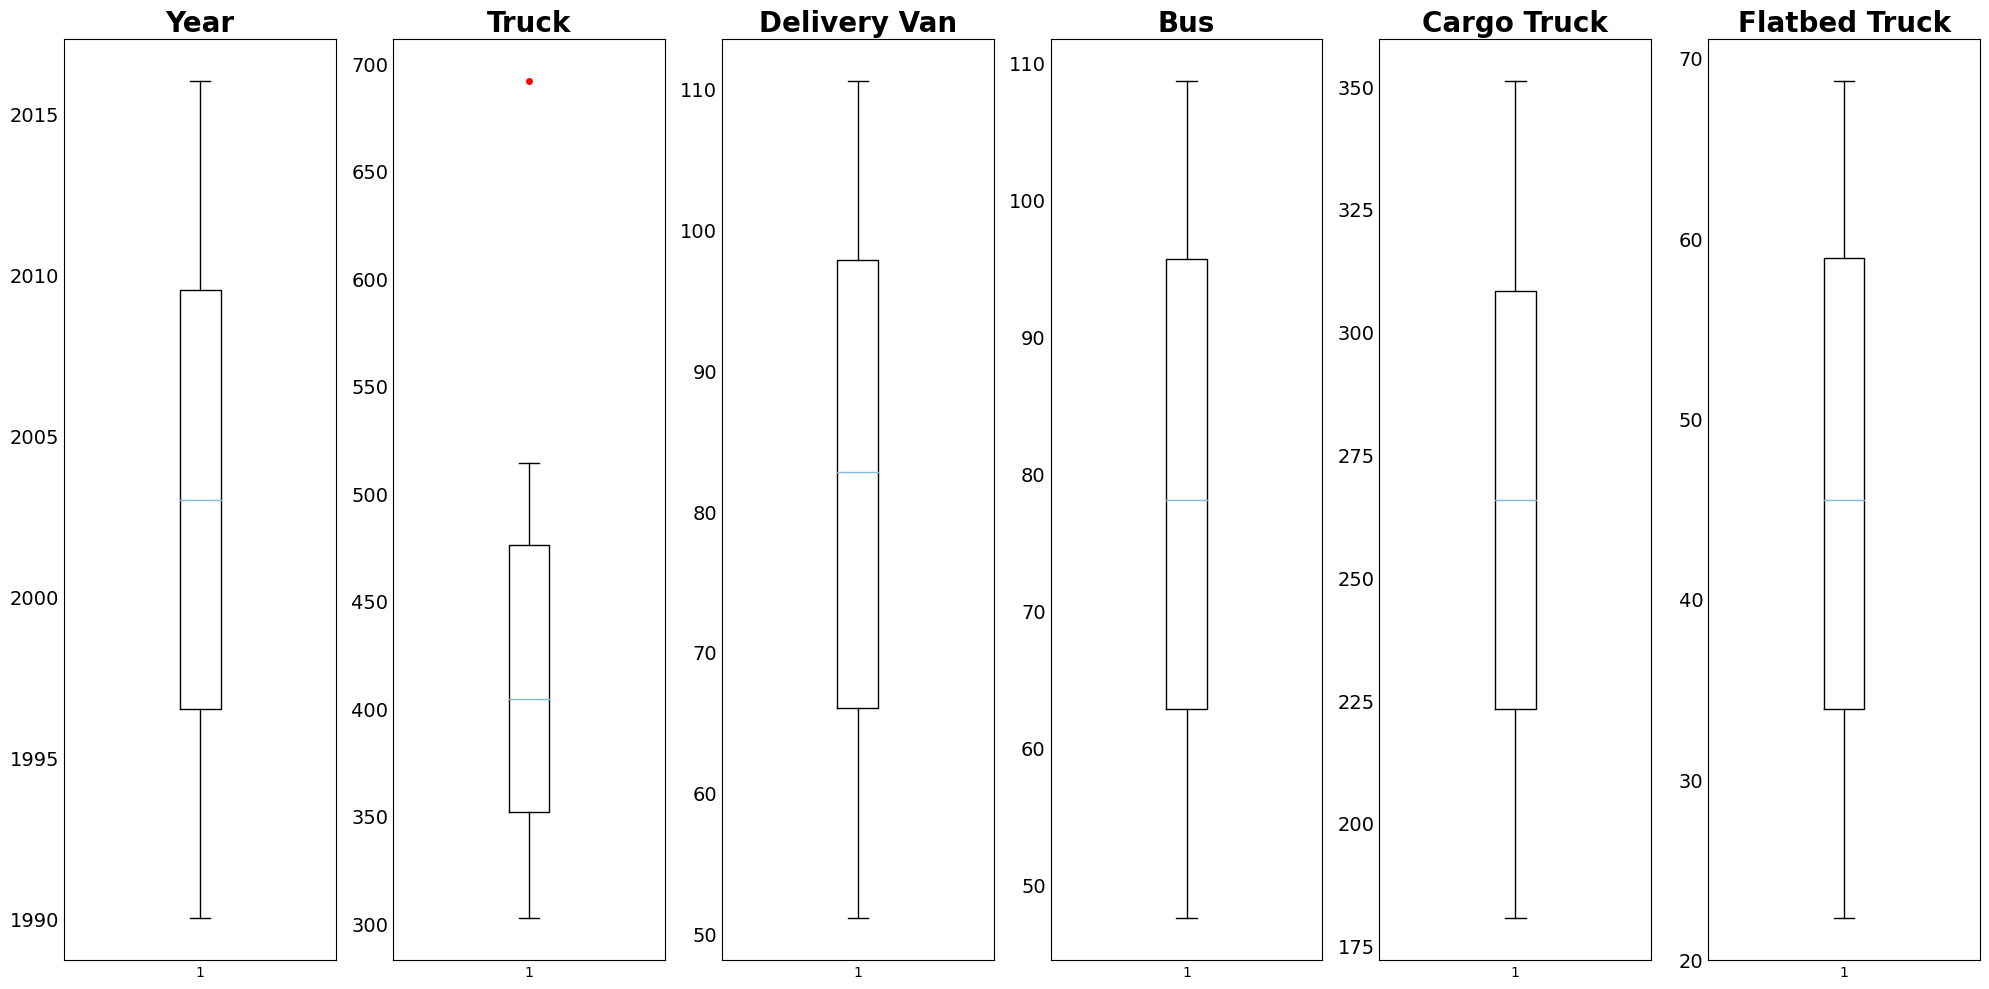

In [29]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df4.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df4.iloc[:,i], flierprops=red_circle)
    ax.set_title(df4.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

#### we can see that finding the z score and using it to detect outliers then changing outliers to their mean values made a significant improvement dataset

In [30]:
df4

,Year,Truck,Delivery Van,Bus,Cargo Truck,Flatbed Truck
0,1990,302.300000,51.100000,47.500000,180.6,22.300000
1,1991,310.800000,53.400000,49.800000,187.2,24.100000
2,1992,318.400000,55.900000,52.200000,193.7,25.900000
3,1993,324.900000,58.200000,54.500000,200.3,27.600000
4,1994,332.200000,60.400000,56.900000,206.8,29.400000
5,1995,340.700000,62.600000,59.200000,213.4,31.200000
6,1996,347.100000,64.800000,61.600000,219.9,33.000000
7,1997,356.500000,67.300000,63.900000,226.5,34.800000
8,1998,364.200000,69.700000,66.300000,233.0,36.600000
9,1999,372.900000,72.000000,68.600000,239.6,38.300000


#### data looks more standardised now

#### next we need to fit the dataset into the year range of 2001 to 2011

In [31]:
df4 = df4[(df4['Year']<2012) & (df4['Year']>2000)]
df4.head(35)

,Year,Truck,Delivery Van,Bus,Cargo Truck,Flatbed Truck
11,2001,388.200000,106.311111,73.300000,252.7,41.900000
12,2002,395.600000,78.900000,75.700000,259.2,43.700000
13,2003,404.300000,80.400000,78.000000,265.8,45.500000
14,2004,691.666667,82.800000,80.400000,272.3,47.300000
15,2005,420.400000,85.100000,82.700000,278.9,61.859259
16,2006,428.800000,87.400000,85.100000,285.4,50.900000
17,2007,437.100000,89.800000,107.159259,292.0,52.600000
18,2008,691.666667,92.100000,89.800000,298.5,54.400000
19,2009,454.200000,94.300000,92.100000,305.1,56.200000
20,2010,462.900000,96.700000,94.500000,311.6,58.000000


#### next add a row for average fuel usage over the years with the mean usage for each vehicle

In [32]:

df4.loc[22] = ['Average Fuel Usage Over The Years', df4['Truck'].mean(), df4['Delivery Van'].mean(), df4['Bus'].mean(), df4['Cargo Truck'].mean(), df4['Flatbed Truck'].mean()]

df4

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26128\814687858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[22] = ['Average Fuel Usage Over The Years', df4['Truck'].mean(), df4['Delivery Van'].mean(), df4['Bus'].mean(), df4['Cargo Truck'].mean(), df4['Flatbed Truck'].mean()]


,Year,Truck,Delivery Van,Bus,Cargo Truck,Flatbed Truck
11,2001,388.200000,106.311111,73.300000,252.700000,41.900000
12,2002,395.600000,78.900000,75.700000,259.200000,43.700000
13,2003,404.300000,80.400000,78.000000,265.800000,45.500000
14,2004,691.666667,82.800000,80.400000,272.300000,47.300000
15,2005,420.400000,85.100000,82.700000,278.900000,61.859259
16,2006,428.800000,87.400000,85.100000,285.400000,50.900000
17,2007,437.100000,89.800000,107.159259,292.000000,52.600000
18,2008,691.666667,92.100000,89.800000,298.500000,54.400000
19,2009,454.200000,94.300000,92.100000,305.100000,56.200000
20,2010,462.900000,96.700000,94.500000,311.600000,58.000000


#### reset the index

In [33]:
df4.reset_index(drop=True, inplace=True)
df4

,Year,Truck,Delivery Van,Bus,Cargo Truck,Flatbed Truck
0,2001,388.200000,106.311111,73.300000,252.700000,41.900000
1,2002,395.600000,78.900000,75.700000,259.200000,43.700000
2,2003,404.300000,80.400000,78.000000,265.800000,45.500000
3,2004,691.666667,82.800000,80.400000,272.300000,47.300000
4,2005,420.400000,85.100000,82.700000,278.900000,61.859259
5,2006,428.800000,87.400000,85.100000,285.400000,50.900000
6,2007,437.100000,89.800000,107.159259,292.000000,52.600000
7,2008,691.666667,92.100000,89.800000,298.500000,54.400000
8,2009,454.200000,94.300000,92.100000,305.100000,56.200000
9,2010,462.900000,96.700000,94.500000,311.600000,58.000000


## Exploratory Data Analysis

#### now, Mr Tan is planning to use a pie chart to pick out the mode of transport that used the most amount of fuel

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26128\1704628661.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slices = [df4.loc[11][1], df4.loc[11][2], df4.loc[11][3], df4.loc[11][4], df4.loc[11][5]]


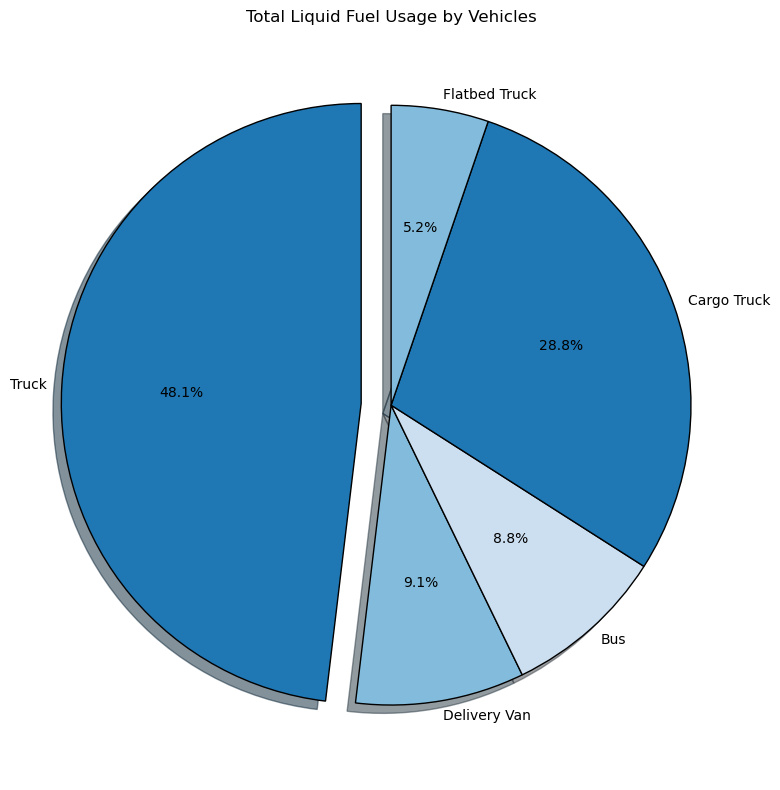

In [67]:
plt.style.use("_mpl-gallery-nogrid")
fig, ax = plt.subplots(figsize=(8, 8))


slices = [df4.loc[11][1], df4.loc[11][2], df4.loc[11][3], df4.loc[11][4], df4.loc[11][5]]
labels = ['Truck', 'Delivery Van', 'Bus', 'Cargo Truck', 'Flatbed Truck']
explode = [0.1, 0, 0, 0, 0]

plt.pie(slices, labels=labels, shadow=True, explode=explode,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'},
        labeldistance=1.05,)

plt.title("Total Liquid Fuel Usage by Vehicles")
plt.tight_layout()
plt.show()


## Conclusion

#### Mr Tan concludes from the pie chart that the mode of transport that uses the most liquid fuel is the truck

---

# Part 4

#### Mr Tan wants to tax truck drivers as a way to discourage trucks as a mode of transport but he wants to find a reasonable tax rate

---

## Importing Required Files 

In [64]:
df5 = pd.read_csv('Data Files/USTruckersSalaryByAge.csv')

df5.head(35)

,Driver,Age,AnnualSalary
0,1,31,33296.33
1,2,59,65096.19
2,3,38,35964.91
3,4,52,83496.94
4,5,44,87079.03
5,6,25,49372.88
6,7,46,78679.40
7,8,50,61561.82
8,9,55,43107.76
9,10,53,51628.60


## Data Wrangling

#### check for null values

In [65]:
df5.isnull().sum()

Driver          0
Age             0
AnnualSalary    0
dtype: int64

#### no years so no need to standardise years

## Exploratory Data Analysis

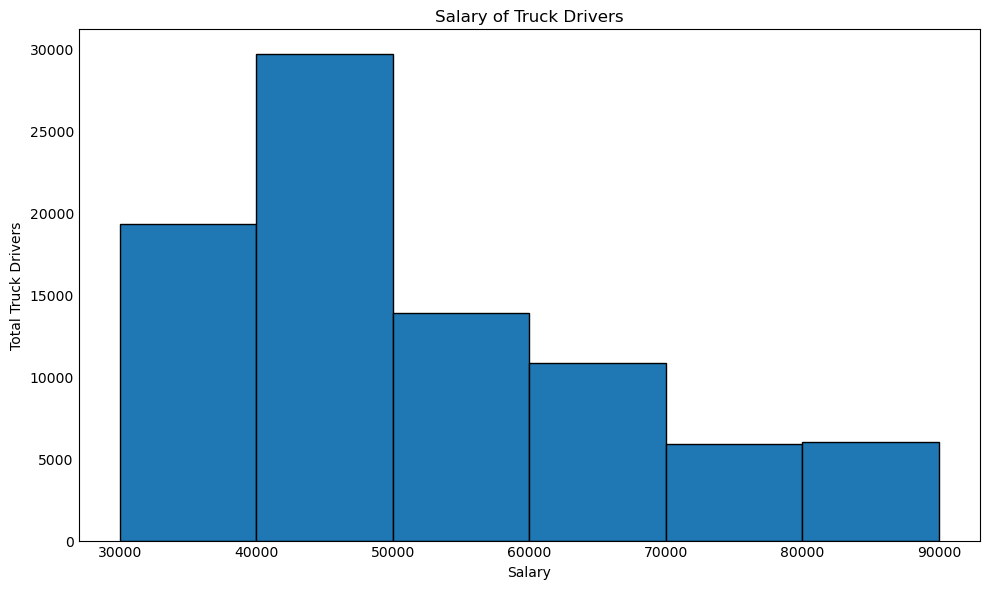

In [66]:
plt.style.use('_mpl-gallery-nogrid')

plt.figure(figsize=(10, 6))
bins = [30000,40000,50000,60000,70000,80000,90000]
plt.hist(df5['AnnualSalary'], bins=bins, edgecolor='black')

plt.title('Salary of Truck Drivers')
plt.xlabel('Salary')
plt.ylabel('Total Truck Drivers')

plt.tight_layout()

plt.show()

## Conclusion

#### Mr Tan concluded from the histogram that around $45000 is the highest distribution of annual salary hence it would be appropriate to charge 10% of $45000 as the addition tax truck drivers will have to pay. This would discourage the transport mode of trucks, hence reduce the amount of fuel used by trucks, therefore reducing the amount of particulate matter 2.5 released into the air by incomplete combustion of liquid fuel. Overall This would in the long run reduce the amount of pm 2.5 in the air. 